# Seaborn - Categorical Plots

Los objetivos de aprendizaje son:

1. Categorical Plots
    - Datos
    - countplot
    - barplot
    - boxplot
    - violinplot
    - stripplot

## Categorical Plots


### Datos

El `DataFrame` `tips` contiene información de las propinas que han dejado comensales en un restaurante. Sus columnas son:

* `total_bill`: monto total de la comida.
* `tip`: monto de la propina.
* `sex`: Género de la persona que ha realizado de reserva.
* `smoker`: Indica si la reserva fue realizada en el área de fumadores.
* `day`: Día de la semana.
* `time`: Horario de la comida. 
* `size`: Número de comensales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})

tips = sns.load_dataset('tips')
print("La Clase de tips es: {}".format(type(tips)))
tips.head()

La Clase de tips es: <class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### `sns.countplot`

La función [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) es como un histograma pero aplicado a variables categóricas.

Los parámetros mínimos son:

* `data`: Datos que utilizaremos para generar el gráfico
* `x`: Dariable categórica sobre la que iremos agrupando y contando observaciones.
* `y`: Si la usamos en lugar de `x`, girará en 90 grados el gráfico. 

Algunos de los parámetro opcionales/con valores por defecto son:

* `hue`: Genera matices de colores mediante el uso de una variable categórica.
* `palette`: Colores a usar en los distintos niveles.

Veamos un par de ejemplos:

#### Forma simple

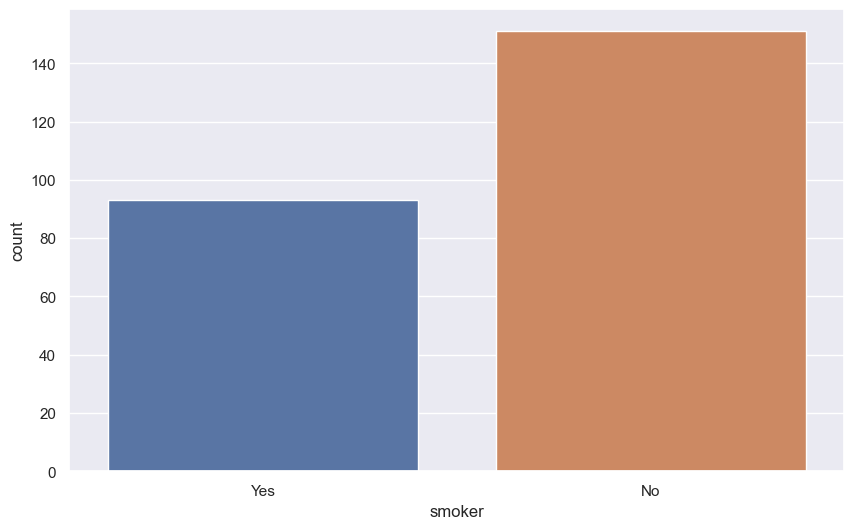

In [2]:
ax = sns.countplot(data = tips, x = 'smoker')

#### + `hue`

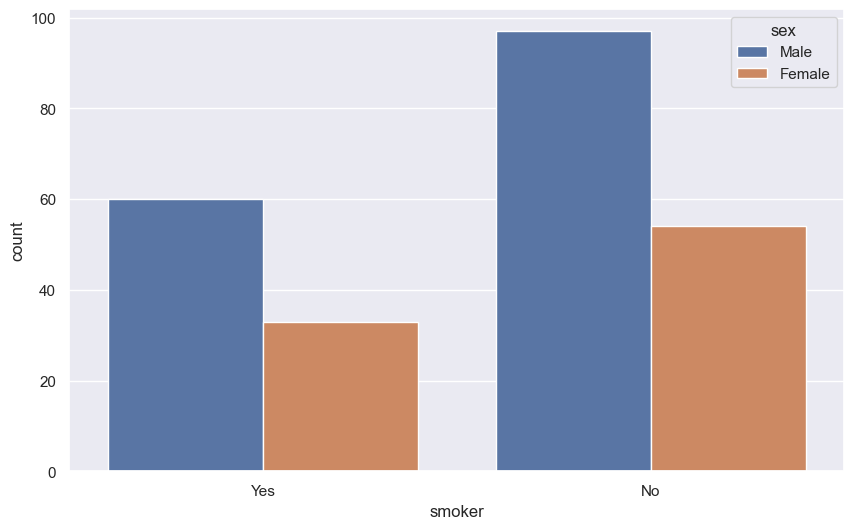

In [3]:
ax = sns.countplot(data = tips, x = 'smoker', hue = "sex")

#### + `y` - `x`

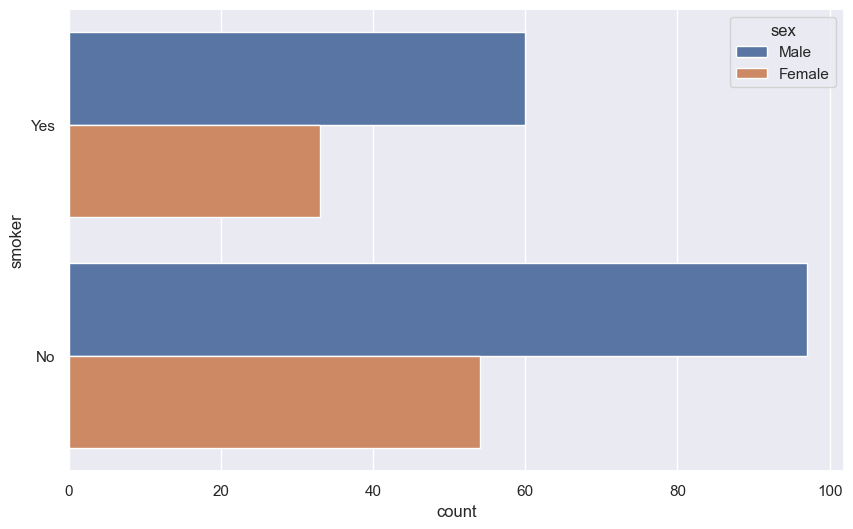

In [4]:
ax = sns.countplot(data = tips, y = 'smoker', hue = "sex")

#### [`palette`](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)

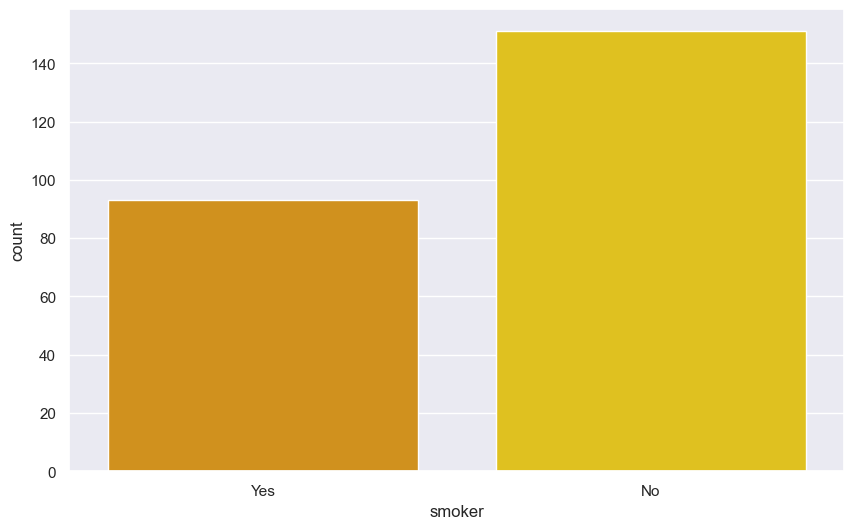

In [5]:
count_ax = sns.countplot(x="smoker", data=tips, palette=["#EE9A00","#FFD700"])

### `sns.barplot`

La función [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) sirve pare representar el resultado de una función de agregación, por defecto la media, además proporciona una medida de incertidumbre en torno a la estimación.

Los parámetros mínimos son:

* `data`: Datos que utilizaremos para generar el gráfico
* `x`: Variable categórica sobre la que iremos agrupando y contando observaciones.
* `y`: Variable numérica que agregaremos por la variable categórica `x`
* `estimator`: Función estadística de agregación, por defecto la media.

Algunos de los parámetro opcionales/con valores por defecto son:

* `hue`: genera matices de colores mediante el uso de una variable categórica.
* `palette`: Colores a usar en los distintos niveles.
* `ci`: Tamaño de los intervalos de confianza. Por defecto utiliza [bootstrapping] para estimar la varianza.
    + "sd": Calculará la varianza directamente con los datos.
    + `None`: No muestra Intervalos de Confianza.

Veamos un par de ejemplos:

### Media

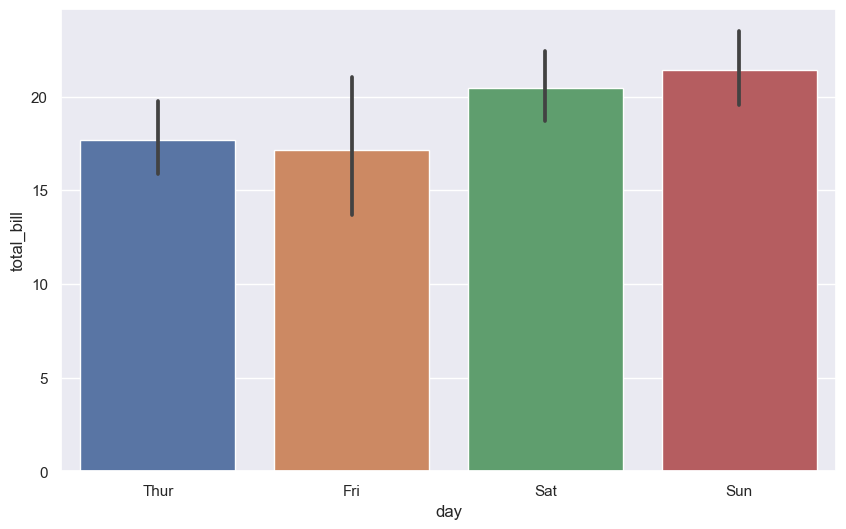

In [6]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

### NumPy estimators + `hue`

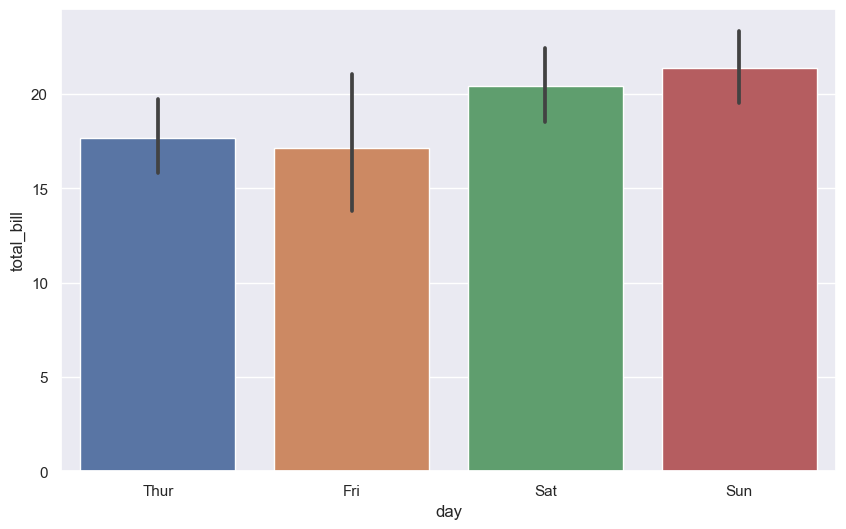

In [7]:
ax = sns.barplot(x="day", y="total_bill", data=tips, estimator = np.mean)

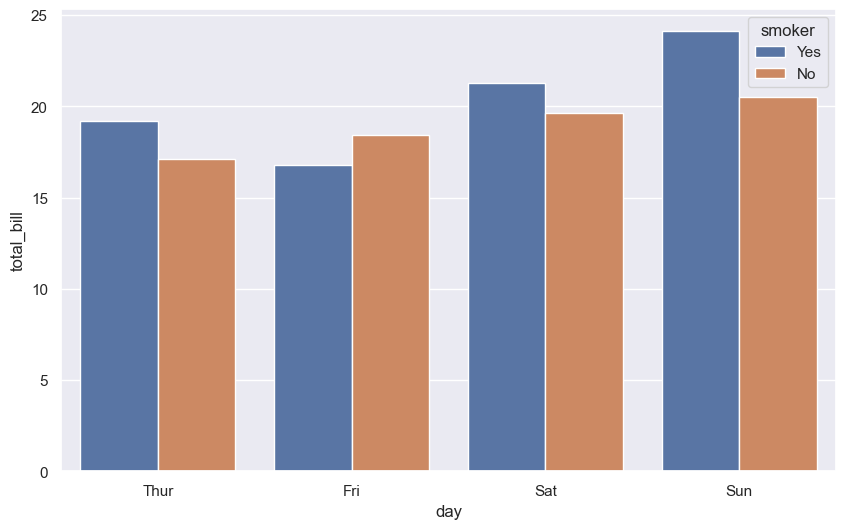

In [9]:
ax = sns.barplot(
    x="day",
    y="total_bill",
    data=tips,
    hue = "smoker",
    estimator = np.mean,
    errorbar = None
)

## `sns.boxplot`

La función [`sns.boxblot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) muestra la distribución de una variable numérica segregada por los distintos niveles de una variable ctegórica.

Los parámetros comunes son:

* `data`: Datos que utilizaremos para generar el gráfico
* `x`: Variable categórica sobre la que iremos agrupando la distru.
* `y`: Variable numérica que servirá para dibujar la distribución `x`.

Algunos de los parámetro opcionales/con valores por defecto son:

* `hue`: genera matices de colores mediante el uso de una variable categórica.
* `palette`: Colores a usar en los distintos niveles.
* `fliersize`: Tamaño de los marcadores utilizados para indicar outliers.
* `showfliers`: Parámetro para mostrar/esconder los outliers.
Veamos un par de ejemplos:

### Distribución Muestral variable `total_bill`

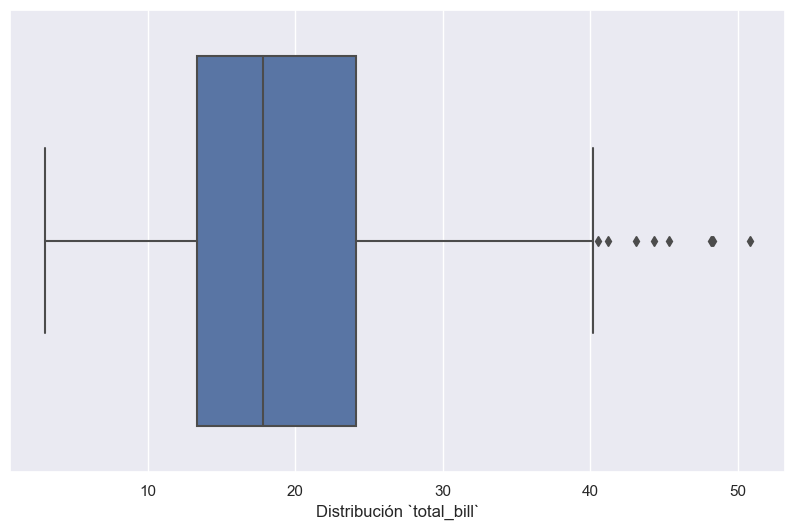

In [10]:
ax = sns.boxplot(data=tips, x = "total_bill")
ax.set_xlabel("Distribución `total_bill`")
plt.show()

### Distribución Muestral variable `total_bill` sin Outliers

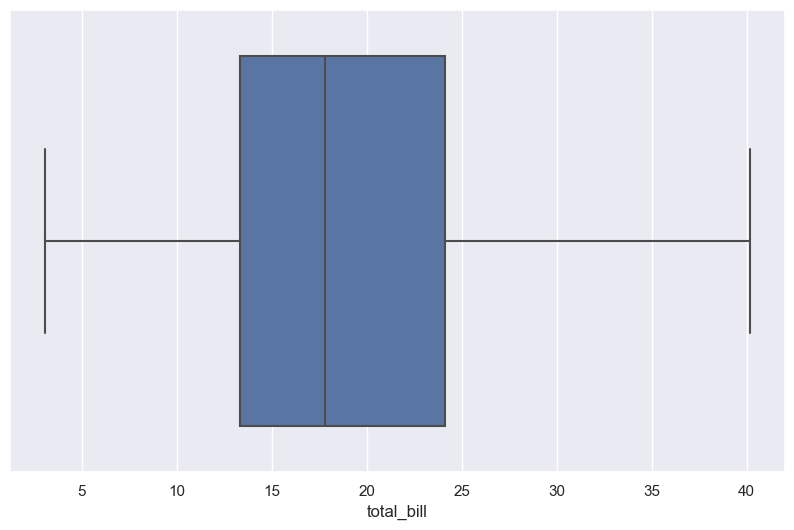

In [11]:
ax = sns.boxplot(data=tips, x = "total_bill", showfliers = False)

### Distribución Muestral de todas las variables numéricas + orientación horizontal

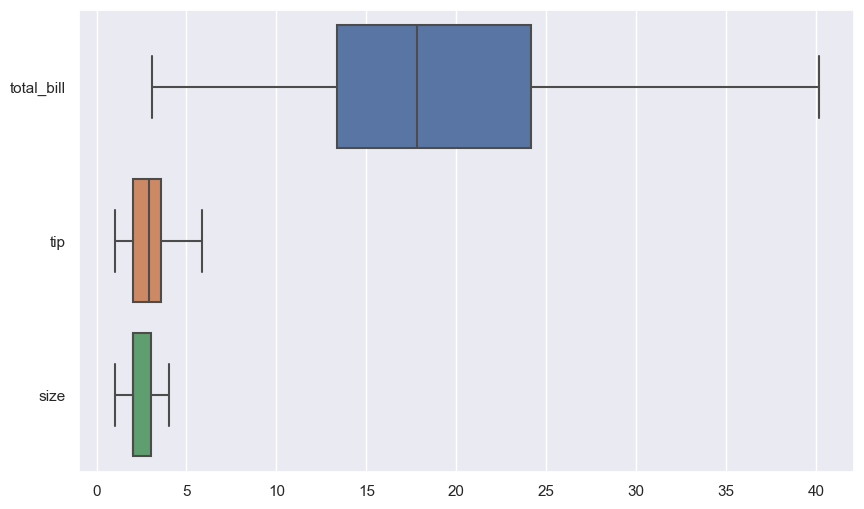

In [12]:
ax = sns.boxplot(data=tips, showfliers = False, orient = "h")

### Distribución Muestral de `total_bill` dividida por día de la semana 

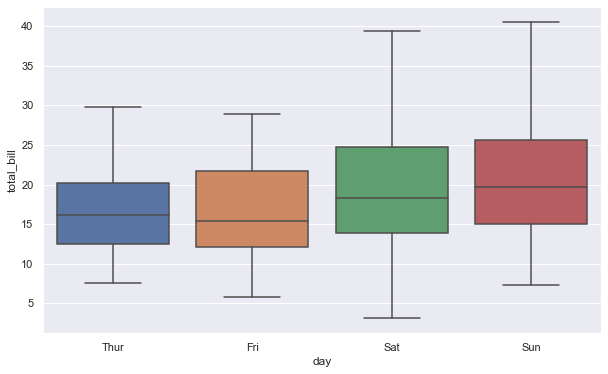

In [31]:
ax = sns.boxplot(data=tips, x = "day", y = "total_bill", showfliers = False)

### Distribución Muestral de `total_bill` dividida por día de la semana y por fumador/no fumador

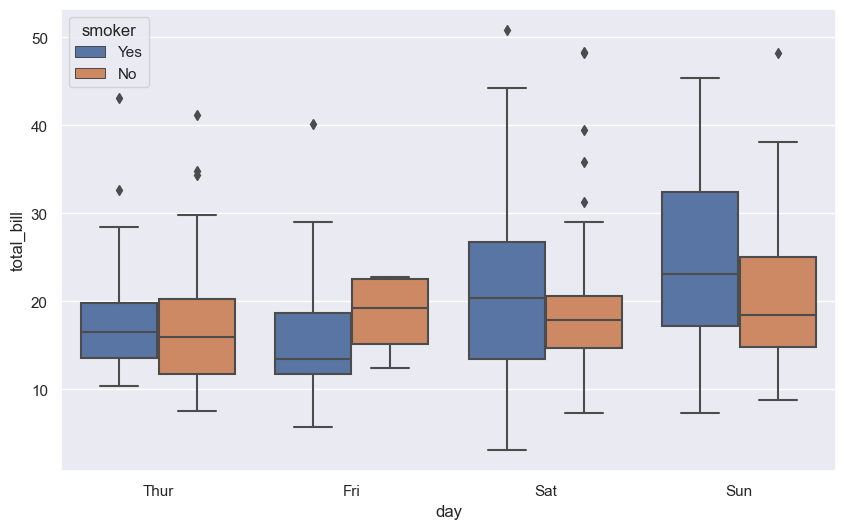

In [13]:
ax = sns.boxplot(data=tips, x = "day", y = "total_bill", hue = "smoker")

## `sns.violinplot`

La función [`sns.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) muestra la distribución de una viariable numérica en función de los niveles de una variable categórica. Pero a diferencia del boxplot, un violinplot muestra una [estimación de la distribución](https://en.wikipedia.org/wiki/Kernel_density_estimation).

>**Nota**: Es importante mencionar que la fiabilidad de la estimación dependerá del tamaño de la mustra y la dispersión de los datos.


Antes de ver las posibilidades del violinplot, recordemos qué figura tenía la distribución subyacente de la variable `total_bill`:

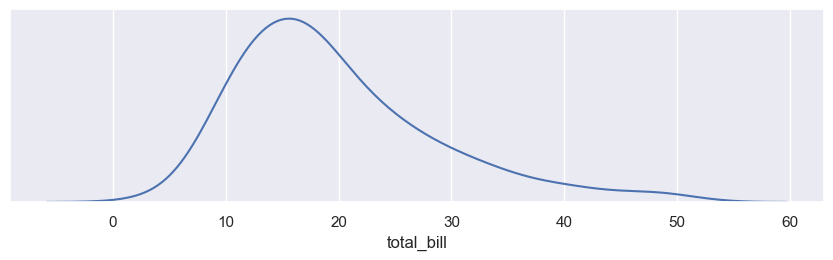

In [14]:
fig, ax = plt.subplots(figsize = (10.5,2.5))
sns.kdeplot(data = tips, x = "total_bill", ax = ax)
ax.get_yaxis().set_visible(False)
plt.show()

Ahora veamos un ejemplo del violinplot.

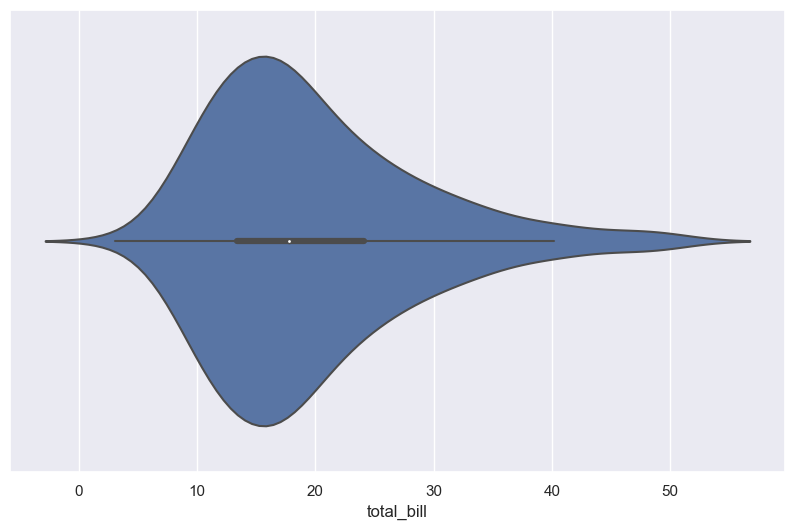

In [15]:
ax = sns.violinplot(data = tips, x = "total_bill")


### Distribución estimada de `total_bill` entre los días.

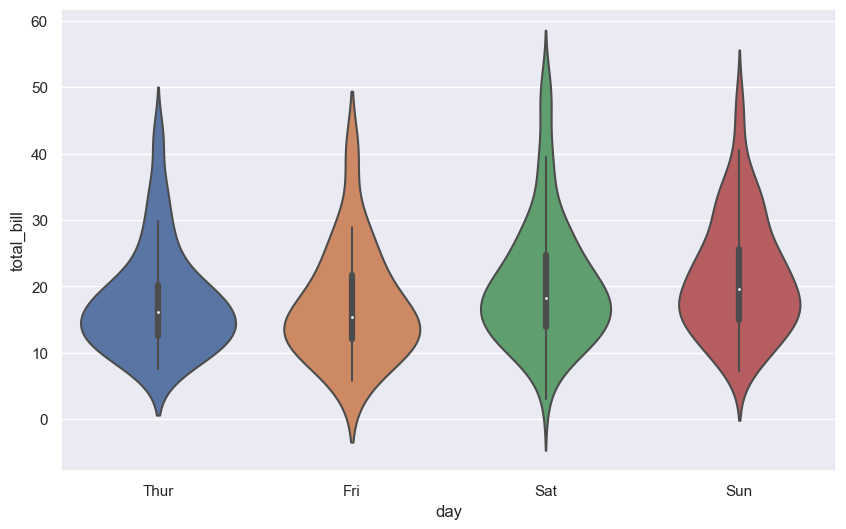

In [16]:
ax = sns.violinplot(data = tips, y = "total_bill", x = "day")

### Distribución Estimada `total_bill` por día de la semana y fumador/no fumador

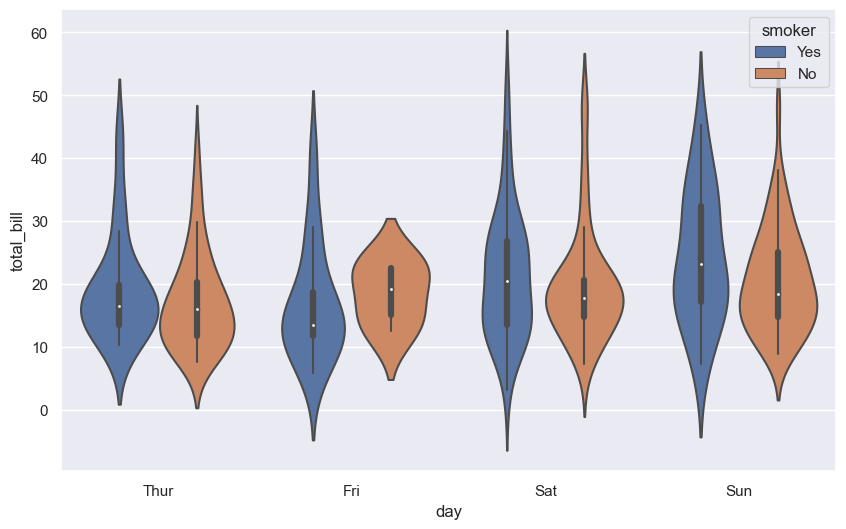

In [17]:
ax = sns.violinplot(data = tips, y = "total_bill", x = "day", hue = "smoker")

Para efectos comparativos me gusta más de la siguiente forma:

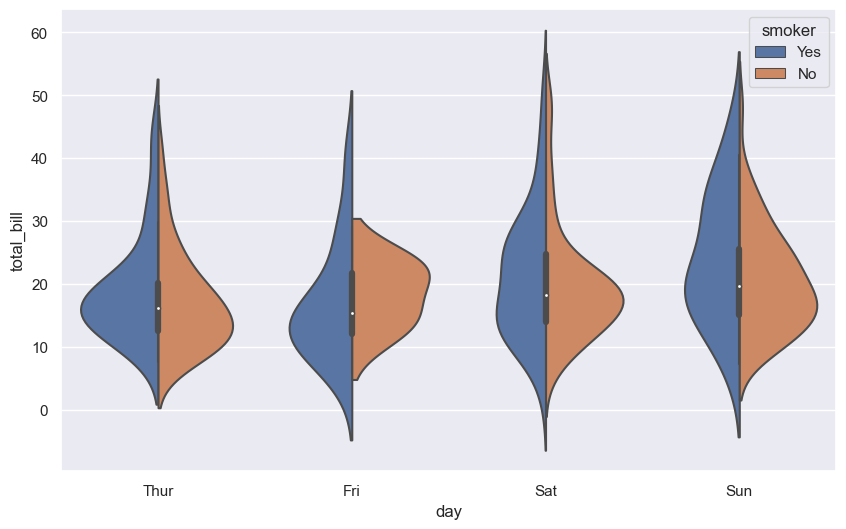

In [18]:
ax = sns.violinplot(data = tips, y = "total_bill", x = "day", hue = "smoker", split = True)

### Escalar el tamaño de la distribución en función del número de observaciones.

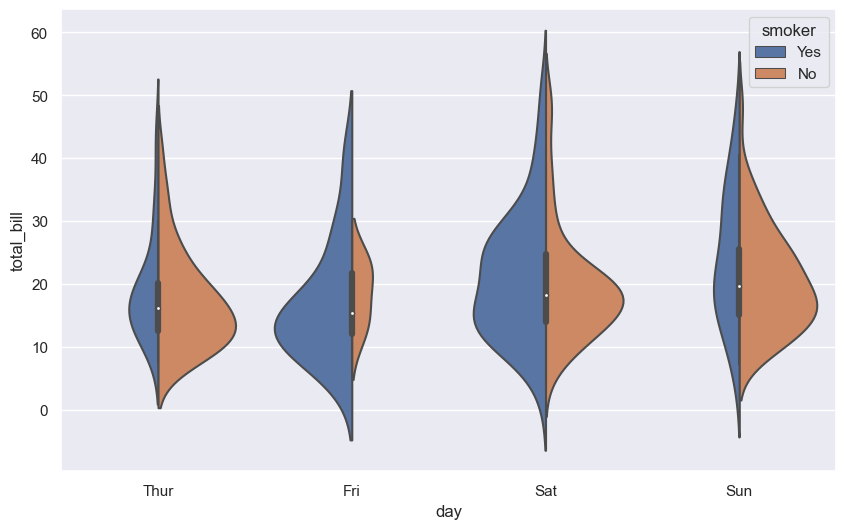

In [10]:
ax = sns.violinplot(y = "total_bill", x = "day", hue = "smoker",
                    data = tips, split = True, scale = "count")

### parámetro inner

El parámetro `inner` permite varial la representación de los datapoints dentro del gráfico, e.g. `"quartile"`

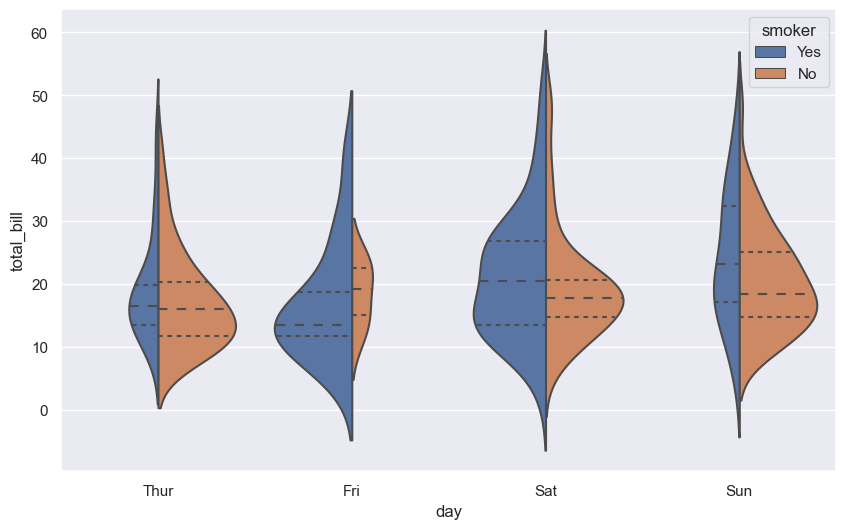

In [19]:
ax = sns.violinplot(y = "total_bill", x = "day", hue = "smoker",
                    data = tips, split = True, scale = "count",
                   inner = "quartile")

## `sns.stripplot`

Un [`sns.stripplot`](https://seaborn.pydata.org/generated/seaborn.stripplot.html) genera un scatterplot en donde una de las variables es categórica. 

Antes de comenzar, recordemos qué es un scatterplot:

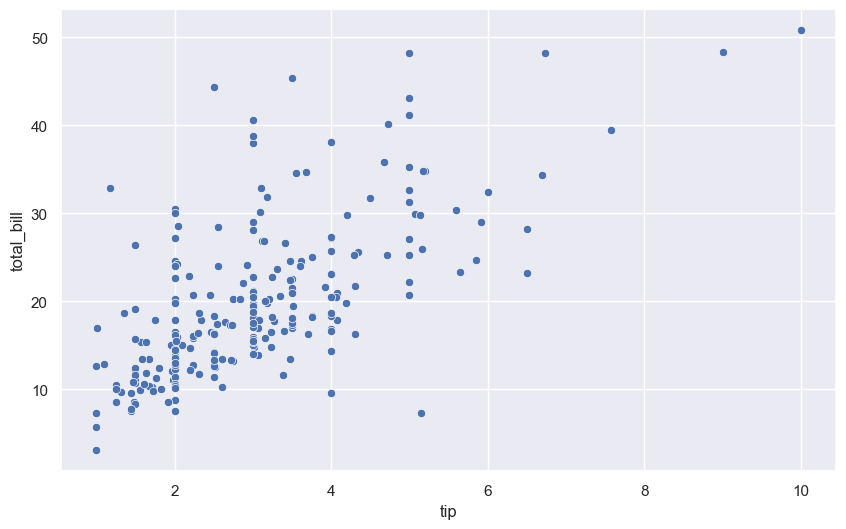

In [20]:
ax = sns.scatterplot(data = tips, y = "total_bill", x = "tip")

### Distribución `total_bill` por día de la semana 

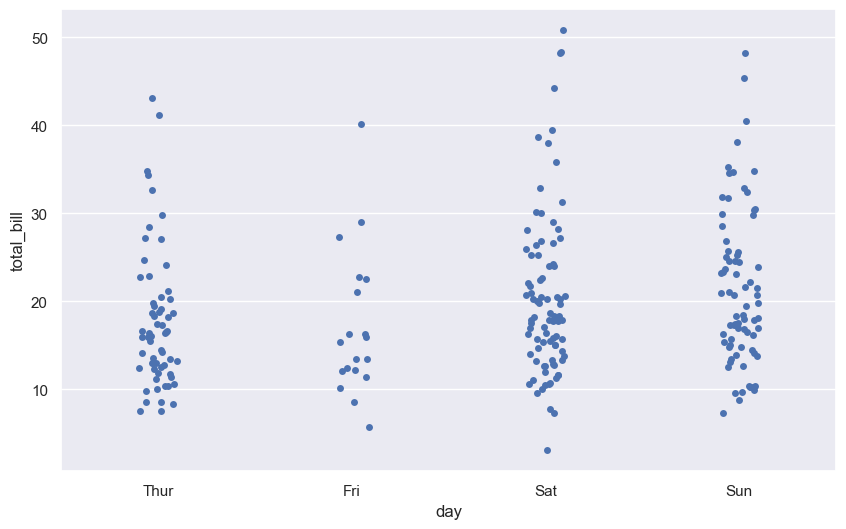

In [21]:
ax = sns.stripplot(data = tips, x = "day", y = "total_bill")

### hue + alpha

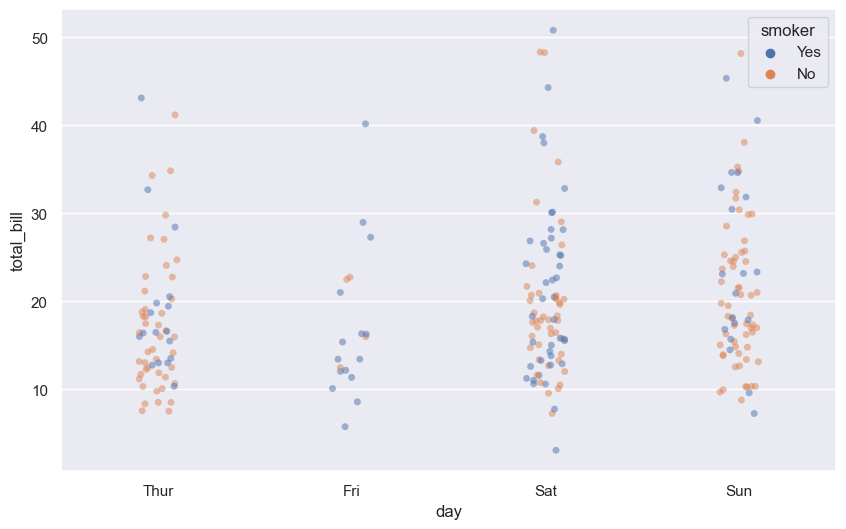

In [22]:
ax = sns.stripplot(data = tips, x = "day", y = "total_bill", hue = "smoker", alpha = 0.5)

### boxplot + stripplot

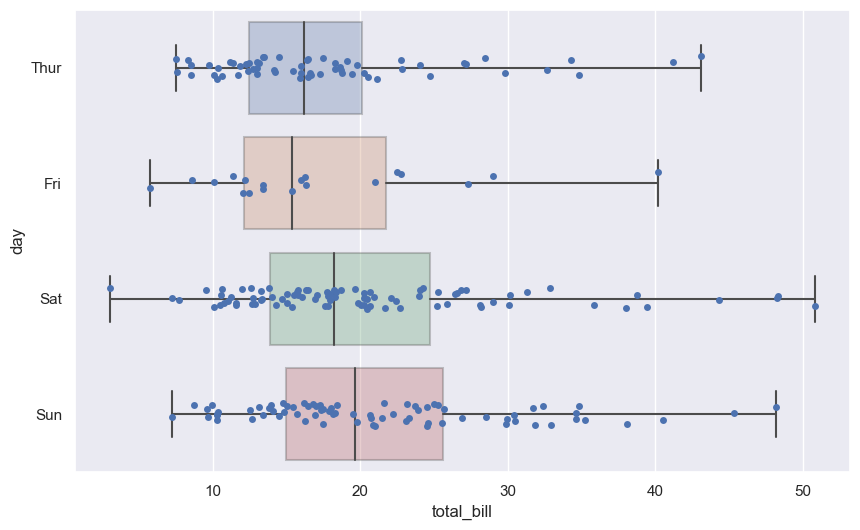

In [15]:
ax = sns.boxplot(x = "total_bill", y = "day", data = tips, boxprops= {"alpha":.3}, #
                 whis = np.inf) # Nos permite configurar lo extenso de las líneas 
ax = sns.stripplot(x = "total_bill", y = "day", data = tips, ax = ax)

Si queremos que los puntos del scatterplot no se sobrepongan, podemos usar la función [`sns.swarmplot()`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) en lugar de la función `sns.stripplot()`

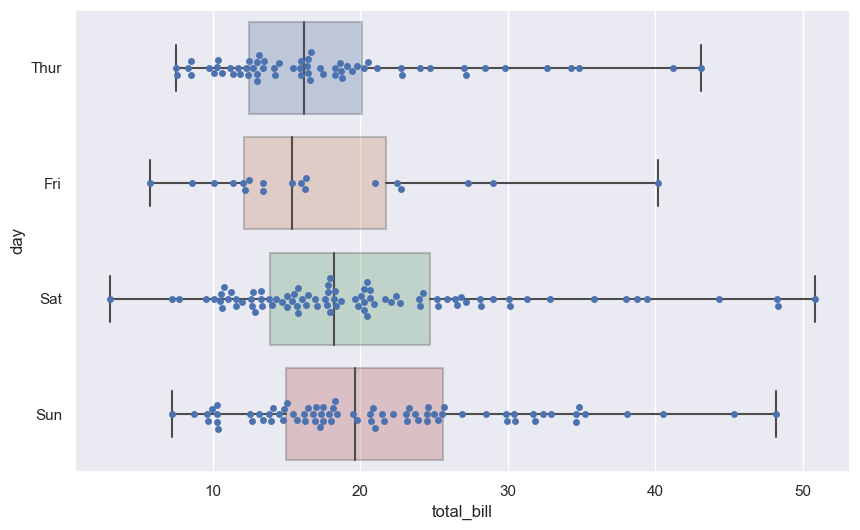

In [16]:
ax = sns.boxplot(x = "total_bill", y = "day", data = tips, boxprops= {"alpha":.3}, #
                 whis = np.inf) # Nos permite configurar lo extenso de las líneas 
ax = sns.swarmplot(x = "total_bill", y = "day", data = tips, ax = ax)